## Spotify Docs: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
## Notações:
<strong>duration_ms:</strong> Duração da música<br>
<strong>key:</strong> Afinação (0 = C, 1 = C♯/D♭, 2 = D). Default = -1<br>
<strong>mode:</strong> Escala musical (maior ou menor)<br>
<strong>time_signature:</strong> quantas batidas possui em cada barra ex: 3/4<br>
<strong>acousticness:</strong> confiabilidade da música ser acústica 1= certeza 0 =  não acústica<br>
<strong>danceability:</strong> o quão dançável a música é: 1=mto 0=nada<br>
<strong>energy:</strong> intencidade da música (rápidas, altas e barulhentas)<br>
<strong>instrumentalness:</strong> conteúdo vocal na música: 1=sem vocal 0=mto vocal<br>
<strong>liveness:</strong> chance da música ser ao vivo: 0.8>= grande chance de ser ao vivo<br>
<strong>loudness:</strong> valores decibéis (dB) da música<br>
<strong>speechiness:</strong> Quanto mais próximo de 1 maior a chance de ser podcast, audiobook ou poesia 0.33 >= && 0.66< (maior chance de vocal com música) <0.33 músicas quase ou sem vocal<br>
<strong>valence:</strong> Quanto mais próxima de 1 mais alegra e quanto mais próximo de 0 é mais triste<br>
<strong>tempo:</strong> BPMN

In [26]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools, time
import matplotlib.pyplot as plt

# with open("songDb.tsv", 'r') as myfile:
#     with open("songDb.csv", 'w') as csv_file:
#         for line in myfile:
#             fileContent = re.sub("\t", ",", line)
#             csv_file.write(fileContent)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Load dataset
playlistSpotify = pd.read_csv('songDb.csv', dtype={},encoding='ISO-8859-1')
# playlistSpotify = pd.read_csv('short_songDb.csv', dtype={},encoding='ISO-8859-1')
playlistSpotify.head()

C:\Users\corre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre
0,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4.0,celticmetal
1,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4.0,celticmetal
2,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353.0,4.0,celticmetal
3,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292.0,4.0,celticmetal
4,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933.0,4.0,celticmetal


In [38]:
playlist = [] #array com dados formatados
speechiness = 0

playlistX = []
playlistY = []

countInstrumentals = 0
countSong = 0
countPodcast = 0

for key, songData in playlistSpotify.iterrows():
    if(songData.Speechness < 0.33):
        speechiness = 0
        countInstrumentals = countInstrumentals+1
    elif (songData.Speechness >= 0.33 and songData.Speechness < 0.66):
        speechiness = 1
        countSong = countSong+1
    else:
        speechiness = 2
        countPodcast = countPodcast+1
        
        
    playlistY.append(speechiness);
    
    playlistX.append([
        songData.Danceability,
        songData.Energy,
        songData.Loudness,
        #speechiness,# songData.Speechness,
        songData.Acousticness,
        songData.Instrumentalness,
        songData.Liveness,
        songData.Valence,
        songData.Tempo
    ])
    
print(countInstrumentals)
print(countSong)
print(countPodcast)

127364
3382
834


In [28]:
pdPlaylistX = pd.DataFrame(playlistX)
pdPlaylistY = pd.DataFrame(playlistY)

X = pdPlaylistX.iloc[:, 0:7]
y = pdPlaylistY.iloc[:, 0]

y = y.astype('int')

print(y)
print('-----')
print(X)

0         0
1         0
2         0
3         0
4         0
         ..
131575    0
131576    0
131577    0
131578    0
131579    0
Name: 0, Length: 131580, dtype: int32
-----
            0      1      2         3         4      5      6
0       0.624  0.857 -6.250  0.020800  0.206000  0.110  0.324
1       0.517  0.916 -4.933  0.000182  0.001910  0.306  0.444
2       0.251  0.894 -4.103  0.014400  0.000000  0.123  0.297
3       0.469  0.743 -5.570  0.002220  0.000111  0.276  0.481
4       0.487  0.952 -4.429  0.000228  0.000000  0.161  0.329
...       ...    ...    ...       ...       ...    ...    ...
131575  0.568  0.708 -9.960  0.007930  0.000528  0.266  0.214
131576  0.470  0.909 -1.674  0.061100  0.000000  0.294  0.607
131577  0.272  0.918 -2.589  0.000749  0.009200  0.307  0.530
131578  0.402  0.902 -4.115  0.000073  0.004650  0.261  0.569
131579  0.482  0.839 -4.171  0.013400  0.244000  0.104  0.571

[131580 rows x 7 columns]


In [35]:
#mlp = MLPClassifier(hidden_layer_sizes=(7, 3), max_iter=2000)     #97.0079039367685
#mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500)       #97.04970360237118
#mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000)     #97.05046359629122
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000) #97.05578355373157
#mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=3000)     #97.03526371789025
#mlp = MLPClassifier(hidden_layer_sizes=(200,30), max_iter=2000)   #97.04894360845114
#mlp = MLPClassifier(hidden_layer_sizes=(300,), max_iter=2000)     #97.08998328013377
#mlp = MLPClassifier(hidden_layer_sizes=(500,), max_iter=3000)     #97.08010335917314
#mlp = MLPClassifier(hidden_layer_sizes=(300,10), max_iter=1000)   #97.0687034503724
#mlp = MLPClassifier(hidden_layer_sizes=(400,), max_iter=2000)     #97.05426356589147

mlp = MLPClassifier(hidden_layer_sizes=(500,), max_iter=3000)

In [36]:
#Armazena as predicões
predictions = cross_val_predict(mlp,X,y,cv=10)
#Calcula acurácia do treino
accuracy_score(y,predictions)*100

97.06338349293205

Normalized confusion matrix


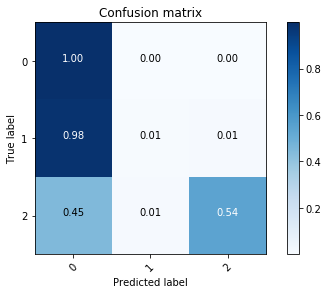

In [39]:
confusion = confusion_matrix(y,predictions)
plot_confusion_matrix(confusion, classes=np.arange(3), normalize=True)

In [ ]:
############################END#############################